<a href="https://colab.research.google.com/github/EtikikotaHrushikesh/Automated-Helmet-and-license-plate-recognition-model/blob/master/ACTUAL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/EtikikotaHrushikesh/Automated-Helmet-and-license-plate-recognition-model.git

Cloning into 'Automated-Helmet-and-license-plate-recognition-model'...
remote: Enumerating objects: 241, done.
remote: Total 241 (delta 0), reused 0 (delta 0), pack-reused 241
Receiving objects: 100% (241/241), 62.01 MiB | 43.19 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [2]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,293 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [3]:
%cd /content/Automated-Helmet-and-license-plate-recognition-model

/content/Automated-Helmet-and-license-plate-recognition-model


In [4]:

# TensorFlow GPU
!pip install -r requirements-gpu.txt


     |████████████████████████████████| 320.4MB 49kB/s 
     |████████████████████████████████| 28.7MB 111kB/s 
     |████████████████████████████████| 3.0MB 42.9MB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 2.9MB 30.1MB/s 
     |████████████████████████████████| 460kB 46.2MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=d9ab196937f9a2bf4265bd59b6b0f982b2be23e5293b8a764f01ad00995526df
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorbo

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [2]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 All		    d.py	   images1		   TEST
'Colab Notebooks'  'FINAL TEST'    images2		   TEST2
 detect.py	    functions.py   Motocross_preview.mp4   yolov3
 detect_video.py    images	  'My Drive'		   yolov6


In [3]:
# this is where my weights is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3/backup

'Copy of yolov3_custom_last.weights'   yolov3_custom_last.weights


In [5]:
# copy the custom weights file file into the /yolov4-custom-functions/data directory of cloud VM
!cp /mydrive/yolov3/backup/yolov3_custom_last.weights /content/Automated-Helmet-and-license-plate-recognition-model/data
# chnge name to custom.weights

In [ ]:
#!cp /mydrive/functions.py /content/yolov4-custom-functions/core

In [7]:
!cp /mydrive/yolov3/obj.names /content/Automated-Helmet-and-license-plate-recognition-model/data/classes

In [ ]:
# change line 14 to custom.classes in core/config.py.by doble click and edit and then save.

In [8]:
%cd /content/Automated-Helmet-and-license-plate-recognition-model

/content/Automated-Helmet-and-license-plate-recognition-model


In [9]:
# Convert darknet weights to tensorflow
## yolov3save
!python save_model.py --weights ./data/custom.weights --output ./checkpoints/custom-416 --input_size 416 --model yolov3

2021-07-09 10:04:34.098782: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-07-09 10:04:35.511236: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-07-09 10:04:35.566706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-09 10:04:35.567302: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-09 10:04:35.567353: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-07-09 10:04:35.802681: I tensorflow/stream_executor/platform/default

In [10]:
from IPython import display

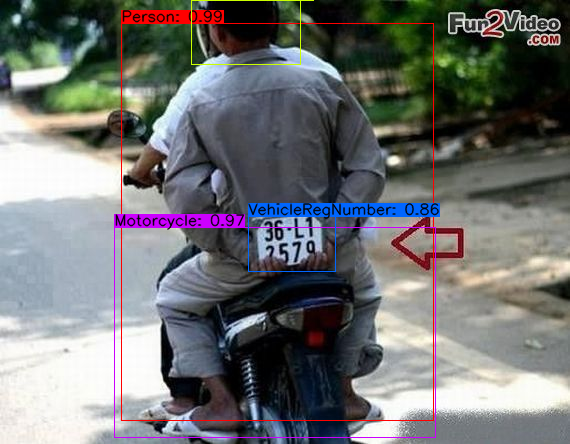

In [60]:
!python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov3 --images /mydrive/TEST/2205.jpg
display.Image("/content/Automated-Helmet-and-license-plate-recognition-model/detections/detection1.png")

In [13]:
%cd /content/Automated-Helmet-and-license-plate-recognition-model

/content/Automated-Helmet-and-license-plate-recognition-model


libpng warning: Image height is zero in IHDR
libpng error: Invalid IHDR data


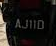

In [68]:
# Run License Plate Recognition
!python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov3 --images /mydrive/TEST/2139.jpg --crop
display.Image("/content/Automated-Helmet-and-license-plate-recognition-model/detections/crop/2139/VehicleRegNumber_1.png")

Class: Helmet, Text Extracted: 
Class: Helmet, Text Extracted: 
Class: Helmet, Text Extracted: 
Class: Helmet, Text Extracted: 
Class: Helmet, Text Extracted: 
Class: Helmet, Text Extracted: 


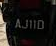

In [72]:
# Run License Plate Recognition
!python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov3 --images /content/Automated-Helmet-and-license-plate-recognition-model/detections/crop/2139/VehicleRegNumber_1.png --ocr
display.Image("/content/Automated-Helmet-and-license-plate-recognition-model/detections/crop/2139/VehicleRegNumber_1.png")

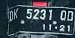

In [36]:
# Run License Plate Recognition
!python detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov3 --images /content/Automated-Helmet-and-license-plate-recognition-model/detections/crop/2142/VehicleRegNumber_1.png --plate
display.Image("/content/Automated-Helmet-and-license-plate-recognition-model/detections/crop/2139/VehicleRegNumber_1.png")

In [17]:
!which tesseract

/usr/bin/tesseract


In [20]:
import pytesseract

import shutil

import os

import random

try:

  from PIL import Image

except ImportError:

  import Image


In [64]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

Text Extracted: 


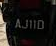

In [71]:
#image_path_in_colab='/content/yolov4-custom-functions/detections/crop/2144/VehicleRegNumber_1.png'

text = pytesseract.image_to_string("/content/Automated-Helmet-and-license-plate-recognition-model/detections/crop/2139/VehicleRegNumber_1.png", config='--psm 11 --oem 3')
print("Text Extracted: {}".format( text))
display.Image("/content/Automated-Helmet-and-license-plate-recognition-model/detections/crop/2139/VehicleRegNumber_1.png")